In [6]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage.color
import skimage.filters
import sklearn.preprocessing
import skimage.exposure
from matplotlib import animation, rc

%matplotlib inline
rc('animation', html='html5')

In [7]:
example_demo_path = glob.glob('../demo/demo_*.npy.npz')[-1]
demo = np.load(example_demo_path)

In [8]:
states = demo['states']
moves = demo['moves']

(96, 96)


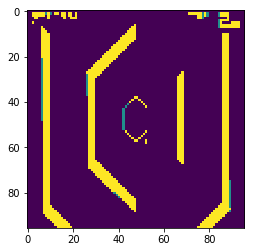

In [9]:
print(states[100][..., -1].shape)
plt.imshow(states[100][..., -1])

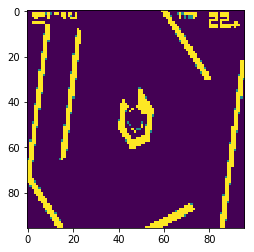

In [10]:
def preprocess_frame(frame):
    for frame_filter in [
        lambda frame: skimage.exposure.rescale_intensity(frame[70:]),
        lambda frame: frame > 0.5,
#         lambda frame: frame > skimage.filters.threshold_otsu(frame[70:]),
        lambda frame: skimage.transform.resize(frame, (96, 96)),
#         lambda frame: skimage.transform.downscale_local_mean(frame, (480 // 48, 768 // 48)),
    ]:
        frame = frame_filter(frame)
    
    return frame

fig = plt.figure()

frames = [
    [plt.imshow(state[..., -1])]
    for state in states
]

ani = animation.ArtistAnimation(fig, frames, interval=20, blit=True)
ani

In [ ]:
print(demo['states'].shape)
print(demo['moves'].shape)

In [ ]:
# An example of when we should move right

print(np.where(moves == 1))
plt.imshow(states[1145][..., -1])

In [ ]:
demo = np.load('../demo/demo_1527458312.npy.npz')

In [ ]:
states = demo['states']

In [ ]:
def preprocess_frame(frame):
    for frame_filter in [
        skimage.color.rgb2gray,
        lambda frame: frame > skimage.filters.threshold_otsu(frame[70:]),
        lambda frame: skimage.transform.resize(frame, (96, 96)),
#         lambda frame: skimage.transform.downscale_local_mean(frame, (480 // 48, 768 // 48)),
    ]:
        frame = frame_filter(frame)
    
    return frame

fig = plt.figure()
frames = [
    [plt.imshow(
        preprocess_frame(states[i][..., -1])
    )]
    for i in range(1000)
]

ani = animation.ArtistAnimation(fig, frames, interval=20, blit=True)
ani